In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy
from scipy import stats
import math
import pandas as pd

### Generating Input Random Variates of each distribution type

In [2]:
## Bernoulli
Bern = scipy.bernoulli.rvs(p=0.6,size=100000)

## Normal
Z = np.random.normal(loc=10, scale=4, size=100000)

## POisson
Pois = np.random.poisson(lam=2, size = 100000)

## Geomteric
geo = np.random.geometric(p=0.4, size = 100000)

## Gamma
Gamma = np.random.gamma(shape=2, scale=2, size=100000)

## Weibull
weib = scipy.weibull_min.rvs(c=2,loc=0, scale=1, size = 100000)

### Viewing shape of each input distribution

(array([39884.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 60116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

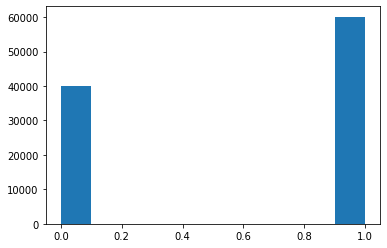

In [3]:
plt.hist(Bern)

(array([3.8000e+01, 7.3800e+02, 4.9760e+03, 1.8144e+04, 3.2241e+04,
        2.8501e+04, 1.2469e+04, 2.5810e+03, 2.9100e+02, 2.1000e+01]),
 array([-6.68784903, -3.22926309,  0.22932284,  3.68790878,  7.14649471,
        10.60508065, 14.06366659, 17.52225252, 20.98083846, 24.43942439,
        27.89801033]),
 <BarContainer object of 10 artists>)

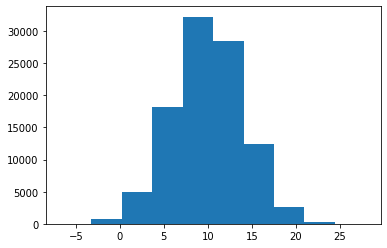

In [4]:
plt.hist(Z)

(array([4.0763e+04, 2.7264e+04, 1.7881e+04, 1.2508e+04, 1.1520e+03,
        3.2400e+02, 1.0300e+02, 1.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

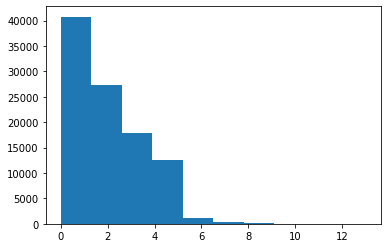

In [5]:
plt.hist(Pois)

(array([6.4217e+04, 2.3044e+04, 8.1200e+03, 2.9370e+03, 1.0460e+03,
        4.1100e+02, 1.5900e+02, 4.3000e+01, 1.5000e+01, 8.0000e+00]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

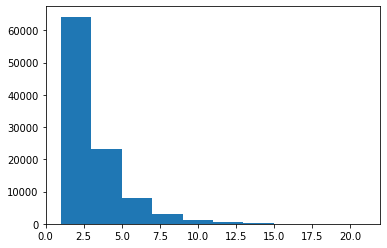

In [6]:
plt.hist(geo)

(array([4.9664e+04, 3.4923e+04, 1.1358e+04, 3.0650e+03, 7.6000e+02,
        1.8100e+02, 4.0000e+01, 7.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.52969328e-02, 3.33610193e+00, 6.65690692e+00, 9.97771192e+00,
        1.32985169e+01, 1.66193219e+01, 1.99401269e+01, 2.32609319e+01,
        2.65817369e+01, 2.99025419e+01, 3.32233469e+01]),
 <BarContainer object of 10 artists>)

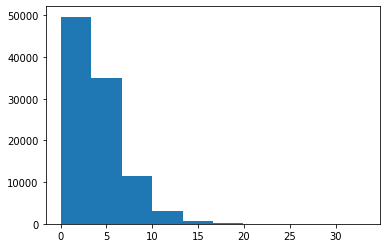

In [7]:
plt.hist(Gamma)

(array([1.0247e+04, 2.4677e+04, 2.7064e+04, 2.0167e+04, 1.1058e+04,
        4.7280e+03, 1.5100e+03, 4.5600e+02, 8.2000e+01, 1.1000e+01]),
 array([5.00026101e-04, 3.27454400e-01, 6.54408774e-01, 9.81363147e-01,
        1.30831752e+00, 1.63527189e+00, 1.96222627e+00, 2.28918064e+00,
        2.61613502e+00, 2.94308939e+00, 3.27004376e+00]),
 <BarContainer object of 10 artists>)

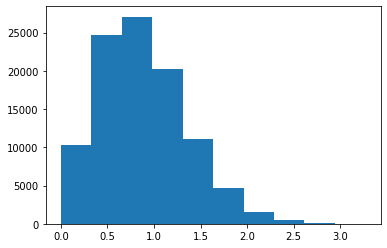

In [8]:
plt.hist(weib)

### Main Code Logic

#### 1) Builds routines to check if input data follows either of the below distributions:
######              a) Continuous Distributions     :   Normal, Gamma , Weibull
######              b) Discrete distributions       :   Bernoulli, Poisson, Geometric
#### 2) Within the logic, code checks and returns below:
######             a) Checks fit for each distribution and returns Maximum Likelihood estimate of each distribution
######             b) Computes Chi-Squared goodness of fit test for the input data with the distributions and returns the test statistic , critical statistic (default 0.05 significance level and the p-value of Chi-Squared test)

#### Function for Exponential Distribution

In [9]:
def exponential(Exp,p=1,conf=0.95):
    
    '''
    Gets set of random variables as inputs and identifies if they follow exponential distribution.
    Returns Tuple ([MLE's], test_statistic, critical_statistic, test_stat_prob)
    '''
    
    ### MLE for Exponential Random Variable
    lambd = len(Exp)/sum(Exp)
    
    ## CReating bins with elements having uniform probability
    k = 10
    pr = 1/k

    bins = [-(1/lambd)*np.log(1 - i*pr) for i in range(k)]
    bins = [(bins[i],bins[i+1]) for i in range(len(bins)-1)]

    ## Calculating the chi-squared test statistic
    f_obs = []
    f_exp = []

    for i in range(len(bins)):

        obs = Exp[(Exp >= bins[i][0]) & (Exp < bins[i][1])]
        exp = len(Exp)/k
        f_obs.append(len(obs))
        f_exp.append(exp)

    test_stat = scipy.chisquare(f_obs=f_obs,f_exp=f_exp)

    ## Calculating the critical Chi-Squared Statistic for the data
    DOF = len(Exp) - p - 1

    critical_stat = stats.chi2.ppf(conf, DOF)
    
    return ([lambd],test_stat[0],critical_stat,test_stat[1])

#### Function for Bernoulli Distribution

In [10]:
def bernoulli(Bern,p=1,conf=0.95):

    ## MLE for Bernoulli
    bern_mle = sum(Bern)/len(Bern)

    ## Creating bins for the events
    bins = sorted(list(np.unique(Bern)))
    #to convert all values to discrete
    bins = [abs(int(i)) for i in bins]

    ## Calculating the chi-squared test statistic
    f_obs = []
    f_exp = []

    for i in bins:

        obs = Bern[Bern == i]
        exp = len(Bern)*(bern_mle**i)*((1-bern_mle)**(1-i))
        f_obs.append(len(obs))
        f_exp.append(exp)

    test_stat = scipy.chisquare(f_obs=f_obs,f_exp=f_exp)

    ## Calculating the critical Chi-Squared Statistic for the data
    DOF = len(Bern) - p - 1

    critical_stat = stats.chi2.ppf(0.95, DOF)

    return ([bern_mle],test_stat[0],critical_stat,test_stat[1])

#### Function for Normal Distribution

In [11]:
def normal(Z,p=2,conf=0.95):
    
    '''
    Gets the set of random variables as input and returns the MLE for Normal Distribution along with Chi-squared test statistics.
    Returns Tuple ([MLE's], test_statistic, critical_statistic, test_stat_prob)
    '''
    
    ## Calculating the Maximum likelihood estimations for Normal distribution
    mu = (1/len(Z))*np.sum(Z)
    var = (1/len(Z))*np.sum([(i-mu)**2 for i in Z])
    
    ## Splitting the data into bins upto 3 Standard deviations using the calculated MLE estimates
    sd = np.sqrt(var)/2
    
    ## Creating bins of equal width from mean upto 3 Standard deviations on both sides.
    bins = sorted([mu-i*sd for i in range(1,4)])
    bins.extend([mu])
    bins.extend([mu+i*sd for i in range(1,4)])
    bins = [(bins[i],bins[i+1]) for i in range(len(bins)-1)]
    
    ## Performing Chi-Squared Test to validate Goodness of fit of the MLE Estimates with Normal Distribution
    f_obs = []
    f_exp = []
    for i in range(len(bins)):

        obs = Z[(Z >= bins[i][0]) & (Z < bins[i][1])]
        if len(obs) == 0:
            obs = [0]
        exp = len(Z)*(scipy.norm(loc=mu,scale=np.sqrt(var)).cdf(max(obs)) - scipy.norm(loc=mu,scale=np.sqrt(var)).cdf(min(obs)))
        f_obs.append(len(obs))
        f_exp.append(exp)
        
    test_stat = scipy.chisquare(f_obs=f_obs,f_exp=f_exp)
    
    ## Calculating the critical Chi-Squared Statistic for the data
    #DOF = len(Z) - p - 1
    DOF = (len(bins)+1) - p -1

    critical_stat = stats.chi2.ppf(conf, DOF) 
    
    return ([mu,var],test_stat[0],critical_stat,test_stat[1])

#### Function for Poisson Distribution

In [12]:
def poisson(Pois,p=1,conf=0.95):
    
    '''
    Gets set of random variables as inputs and identifies if they follow poisson distribution.
    Returns Tuple ([MLE's], test_statistic, critical_statistic, test_stat_prob)
    '''
    
    ### MLE for Exponential Random Variable
    lambd = (1/len(Pois))*sum(Pois)
    
    ## Creating bins for the events
    x = sorted(list(np.unique(Pois)))

    #bins = [len(poisson)*(np.exp(-lambd)*(lambd)**i)/math.factorial(i) for i in x]
    bins = sorted(list(np.unique(Pois)))
    #to convert all values to discrete
    bins = [abs(int(i)) for i in bins]

    ## Calculating the chi-squared test statistic
    f_obs = []
    f_exp = []

    for i in bins:

        obs = Pois[Pois == i]
        exp = len(Pois)*(np.exp(-lambd)*(lambd)**i)/math.factorial(i)
        f_obs.append(len(obs))
        f_exp.append(exp)

    test_stat = scipy.chisquare(f_obs=f_obs,f_exp=f_exp)

    ## Calculating the critical Chi-Squared Statistic for the data
    #DOF = len(Pois) - p - 1
    DOF = (len(bins)+1) - p - 1

    critical_stat = stats.chi2.ppf(conf, DOF)
    
    return ([lambd],test_stat[0],critical_stat,test_stat[1])

#### Function for Geometric Distribution

In [13]:
def geometric(geo, p=1, conf=0.95):
    
    '''
    Gets set of random variables as inputs and identifies if they follow Geometric distribution using Chi-Squared goodness of fit test.
    Returns Tuple ([MLE's], test_statistic, critical_statistic, test_stat_prob)
    '''
    
    ## Getting the maximum likelihood estimation of p
    p_mle = 1/np.average(geo)

    ## Creating bins for the events
    bins = sorted(list(np.unique(geo)))
    #to convert all values to discrete
    bins = [abs(int(i)) for i in bins]

    ## Calculating the chi-squared test statistic
    f_obs = []
    f_exp = []

    for i in bins:

        obs = geo[geo == i]
        exp = len(geo)*(p_mle*(1-p_mle)**(i-1))
        f_obs.append(len(obs))
        f_exp.append(exp)

    test_stat = scipy.chisquare(f_obs=f_obs,f_exp=f_exp)

    #DOF = len(geo) - p - 1
    DOF = (len(bins)+1) - p - 1
    
    critical_stat = stats.chi2.ppf(conf, DOF)
    
    return([p_mle],test_stat[0],critical_stat,test_stat[1])

#### Function for Gamma Distribution

In [14]:
def gamma(Gamma, p=2, conf=0.95):
    
    '''
    Gets set of random variables as inputs and identifies if they follow Gamma distribution.
    Returns Tuple ([MLE's], test_statistic, critical_statistic, test_stat_prob)
    '''

    ## Calculating the MLE for gamma distribution
    alpha = (np.average(Gamma)/np.std(Gamma))**2
    beta = np.std(Gamma)**2/np.average(Gamma)

    ## Splitting the data into equally sized bins
    k = 10

    ## Creating bins of equal width from mean upto 3 Standard deviations on both sides.
    bins = sorted(Gamma)
    bins = np.split(np.array(bins), k)

    ## Performing Chi-Squared Test to validate Goodness of fit of the MLE Estimates with Gamma Distribution
    f_obs = []
    f_exp = []
    for i in range(len(bins)):

        obs = bins[i]
        if len(obs) == 0:
            obs = [0]
        exp = len(Gamma)*(scipy.gamma(a=alpha, scale=beta).cdf(max(obs)) - scipy.gamma(a=alpha, scale=beta).cdf(min(obs)))
        f_obs.append(len(obs))
        f_exp.append(exp)

    test_stat = scipy.chisquare(f_obs=f_obs,f_exp=f_exp)

    ## Calculating the critical Chi-Squared Statistic for the data
    DOF = k - p - 1

    critical_stat = stats.chi2.ppf(conf, DOF) 

    return([alpha,beta],test_stat[0],critical_stat,test_stat[1])

#### Function for Weibull Distribution

In [15]:
def weibull(weib, p=2, conf=0.95):
    
    '''
    Gets set of random variables as inputs and identifies if they follow Weibull distribution.
    Returns Tuple ([MLE's], test_statistic, critical_statistic, test_stat_prob)
    '''

    def g_prime(r,weib):
        return -len(weib)/r**2 - (len(weib)*(sum([(i**r)*(np.log(i+10**-25))**2 for i in weib])))/(sum([i**r for i in weib])) + (len(weib)*(sum([ ((i**r)*np.log(i+10**-25))**2 for i in weib])))/((sum([i**r for i in weib])))**2

    def g(r,weib):
        return (len(weib)/r) + (sum([np.log(i+10**-25) for i in weib])) - (len(weib) * sum([(i**r)*np.log(i+10**-25) for i in weib]))/(sum([i**r for i in weib]))

    ## MLE's for a, lambd for Weibull(a, lambd)
    X_bar = sum(weib)/len(weib)
    S2_bar = (1/(len(weib)-1))*(sum([(i-X_bar)**2 for i in weib]))

    ## Using Newton's method to evaluate a_mle
    ## Initializing a_mle to sample variance
    a_mle = X_bar/np.sqrt(S2_bar)

    i = 0
    while True:  
        if np.isnan(np.abs(g(a_mle, weib))):
            break
        if np.abs(g(a_mle, weib)) < 0.001:
            break    
        a_mle = a_mle - (g(a_mle, weib) / g_prime(a_mle, weib))  
        i +=1

    #lambd_mle = (sum([i**a_mle for i in weib]))**(-1/a_mle)
    lambd_mle = (sum([i**a_mle for i in weib])/len(weib))**(1/a_mle)
    
    ## Grouping the data into bins
    k=8
    bins = []
    a_hat = [((-math.log(1 - (i/k)))**(1/a_mle))*(1/lambd_mle) for i in range(1,k)]  
    bins.append((0.0, a_hat[0]))
    bins.extend([(a_hat[i], a_hat[i+1]) for i in range(len(a_hat)-1)])
    bins.append((a_hat[-1], max(weib)))
    
    f_obs = []
    f_exp = []
    
    for i in range(len(bins)):
        obs = weib[(weib >= bins[i][0]) & (weib < bins[i][1])]
        f_exp.append(len(weib) / k)
        f_obs.append(len(obs))
        
    test_stat = scipy.chisquare(f_obs=f_obs,f_exp=f_exp)

    DOF = k - p - 1

    critical_stat = stats.chi2.ppf(conf, DOF) 
    
    return ([a_mle,lambd_mle],test_stat[0],critical_stat,test_stat[1] )

#### Final Code combining all routines

In [47]:
def main(data, p, conf=0.95):
    
    '''
    This routine gets the input data (some distribution), and finds the best fit for the data amongs the distribution routines defined.
    The best fit will be the distribution that has the maximum p-value (or Chi-Squared test statistic lower than the critical value)
    '''
    
    distributions = ['Bernoulli', 'Exponential', 'Poisson', 'Normal', 'Gamma', 'Weibull']
    
    results = []
    df_list = []
    
    results.append(bernoulli(data,1,conf))
    results.append(exponential(data,1,conf))
    results.append(poisson(data,1,conf))
    #results.append(geometric(data,1,conf))
    results.append(normal(data,2,conf))
    results.append(gamma(data,2,conf))
    results.append(weibull(data,2,conf))
    
    for i,dist in enumerate(distributions):
        MLE, Test_Stat, Critical_stat, P_Value = results[i]
        df_list.append([dist, MLE, Test_Stat, Critical_stat, P_Value])
        
    df = pd.DataFrame(df_list, columns= ['Distribution', 'Maximum Likelihood Estimators', 'Test Statistic', 'Critical Statistic', 'PValue'])
    
    return df.sort_values(by=['PValue'], ascending=False)
    

#### Scenario 1 : Generating Input Normal Data and testing goodness of fit.

#### Input Mean = 10, Variance = 16

In [25]:
Z = np.random.normal(loc=10, scale=4, size=100000)

In [26]:
main(Z, p=2)

c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


,Distribution,Maximum Likelihood Estimators,Test Statistic,Critical Statistic,PValue
4,Normal,"[10.005491428519711, 16.051966097632445]",5.897217e+00,9.487729,0.316349
0,Bernoulli,[10.005491428519726],3.335592e+08,100734.728821,0.000000
1,Exponential,[0.09994511585403917],8.515512e+04,100734.728821,0.000000
2,Poisson,[10.005491428519727],7.796419e+08,100735.732499,0.000000
3,Geometric,[0.09994511585403933],4.442179e+08,100735.732499,0.000000
5,Gamma,"[6.236610401323174, 1.604315611312986]",4.239537e+03,14.067140,0.000000
6,Weibull,"[2.4973081578409806, nan]",1.000000e+05,11.070498,0.000000


#### Scenario 2: Generating Poisson Data and testing good ness of fit

#### Input parameter (Lambda) = 2

In [27]:
Pois = np.random.poisson(lam=2, size = 100000)

In [28]:
main(Pois, p=1)

c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp
c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':
c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in power
c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars


,Distribution,Maximum Likelihood Estimators,Test Statistic,Critical Statistic,PValue
2,Poisson,[2.0055300000000003],1.556980e+01,19.675138,0.157868
0,Bernoulli,[2.00553],1.328368e+08,100734.728821,0.000000
1,Exponential,[0.49862131207212057],1.053708e+05,100734.728821,0.000000
3,Geometric,[0.4986213120721206],8.960535e+04,19.675138,0.000000
4,Normal,"[2.0055300000000003, 2.0059594191000003]",inf,9.487729,0.000000
5,Gamma,"[2.005100672826467, 1.000214117515071]",inf,14.067140,0.000000
6,Weibull,"[-2.538126198481912, 0.0]",7.000000e+05,11.070498,0.000000


#### Scenario 3: Generating Bernoulli Data and testing good ness of fit

#### Input parameter (p) = 0.6

In [33]:
Bern = scipy.bernoulli.rvs(p=0.6,size=100000)

In [34]:
main(Bern, p=1)

c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp
c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':
c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in power
c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars


,Distribution,Maximum Likelihood Estimators,Test Statistic,Critical Statistic,PValue
0,Bernoulli,[0.60161],0.000000e+00,100734.728821,1.0
1,Exponential,[1.6622064127923406],4.106492e+05,100734.728821,0.0
2,Poisson,[0.6016100000000001],2.652022e+04,3.841459,0.0
3,Normal,"[0.6016100000000001, 0.23967540789999997]",inf,9.487729,0.0
4,Gamma,"[1.5101031652400914, 0.3983899999999999]",inf,14.067140,0.0
5,Weibull,"[-32.17339632027102, 0.0]",7.000000e+05,11.070498,0.0


#### Scenario 4: Generating Geometric Data and testing good ness of fit

#### Input parameter (lambda) = 0.4

In [37]:
geo = np.random.geometric(p=0.4, size = 100000)

In [38]:
main(geo, p=1)

c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


,Distribution,Maximum Likelihood Estimators,Test Statistic,Critical Statistic,PValue
3,Geometric,[0.40111992683572534],6.240971e+01,35.172462,0.000017
0,Bernoulli,[2.49302],4.401125e+11,100734.728821,0.000000
1,Exponential,[0.40111992683572534],1.541648e+05,100734.728821,0.000000
2,Poisson,[2.49302],3.343473e+15,35.172462,0.000000
4,Normal,"[2.49302, 3.6993112796000003]",inf,9.487729,0.000000
5,Gamma,"[1.6800826561078237, 1.4838674698157257]",inf,14.067140,0.000000
6,Weibull,"[1.4586612418199263, 2.7814322897426336]",6.999860e+05,11.070498,0.000000


#### Scenario 5: Generating Gamma Data and testing good ness of fit

#### Input parameter (alpha, beta) = (2,2)

In [54]:
Gamma = np.random.gamma(shape=3, scale=2, size=100000)

In [55]:
main(Gamma, p=2)

,Distribution,Maximum Likelihood Estimators,Test Statistic,Critical Statistic,PValue
4,Gamma,"[2.9937100374898904, 1.9998851014942356]",8.144884e+00,14.067140,0.519614
0,Bernoulli,[5.987076102169886],1.166222e+09,100734.728821,0.000000
1,Exponential,[0.167026438771602],3.362449e+04,100734.728821,0.000000
2,Poisson,[5.987076102169887],9.518671e+08,100735.732499,0.000000
3,Normal,"[5.987076102169782, 11.973464298241526]",7.660864e+03,9.487729,0.000000
5,Weibull,"[1.830871519646228, 6.760282911064936]",6.997780e+05,11.070498,0.000000


#### Scenario 6: Generating Weibull Data and testing good ness of fit

#### Input parameter (alpha, beta) = (2,1)

In [50]:
weib = scipy.weibull_min.rvs(c=2,loc=0, scale=1, size = 100000)

In [51]:
main(weib, p=2)

,Distribution,Maximum Likelihood Estimators,Test Statistic,Critical Statistic,PValue
5,Weibull,"[1.9963315577396386, 0.999148418876417]",2.626320e+00,11.070498,0.917289
0,Bernoulli,[0.885460196750715],5.116987e+09,100734.728821,0.000000
1,Exponential,[1.1293562417256024],3.828965e+04,100734.728821,0.000000
2,Poisson,[0.8854601967507151],3.914917e+09,100735.732499,0.000000
3,Normal,"[0.8854601967507069, 0.21503580912449022]",3.130903e+03,9.487729,0.000000
4,Gamma,"[3.6460892872772557, 0.2428520332292605]",1.825949e+03,14.067140,0.000000


#### SCenario 8 : Generating uniform distribution

In [42]:
uni = np.random.uniform(0,1, size = 1000)

(array([ 97.,  97.,  96.,  96.,  99.,  93., 111., 112.,  98., 101.]),
 array([3.35542315e-04, 1.00103499e-01, 1.99871455e-01, 2.99639411e-01,
        3.99407367e-01, 4.99175324e-01, 5.98943280e-01, 6.98711236e-01,
        7.98479192e-01, 8.98247149e-01, 9.98015105e-01]),
 <BarContainer object of 10 artists>)

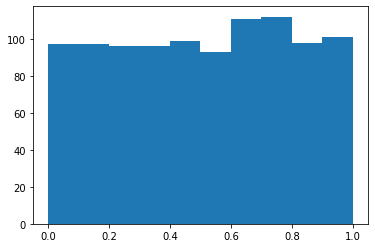

In [43]:
plt.hist(uni)

In [48]:
main(uni, p=2)

,Distribution,Maximum Likelihood Estimators,Test Statistic,Critical Statistic,PValue
3,Normal,"[0.5060954568418222, 0.08408587692660265]",80.851217,9.487729,5.568555e-16
1,Exponential,[1.975911829440796],307.760000,1072.605834,9.176022e-62
4,Gamma,"[3.0460836087790013, 0.166146278908177]",537.773933,14.067140,4.649356e-110
0,Bernoulli,[0.5060954568418221],493904.543158,1072.605834,0.000000e+00
2,Poisson,[0.5060954568418221],602844.823094,1073.642651,0.000000e+00
5,Weibull,"[1.6228201647003904, 0.5580992920891525]",2116.048000,11.070498,0.000000e+00
